# Information Retrieval 1/2

Dans cette session, nous allons explorer plusieurs méthodes d'Information Retrieval (IR). L'objectif est de comprendre les intérêts et limites de différentes méthodes.

Ces méthodes permettent de sélectionner les passages de texte les plus pertinents à envoyer au modèle génératif. C'est donc une étape essentielle du développement d'un système de RAG, pour permettre de générer une réponse appropriée.

Il faudra ensuite séléctionner les meilleures méthodes à intégrer à l'outil de RAG.

## Load text chunks

In [1]:
# Passages textuels test

text_chunks = ["""New York is known to be the largest Italian-American population in North America and third largest Italian population outside of Italy, according to the 2000 census. See also Italians in New York City for more info.""",
                """Graziano is perhaps the best place in NYC to eat quality fresh pasta, or enjoy a Neapolitan-style pizza.""",
                """The Italian wolf is the national animal of Italy,[159] while the national tree is the strawberry tree.[160] The reasons for this are that the Italian wolf, which inhabits the Apennine Mountains and the Western Alps, features prominently in Latin and Italian cultures, such as the legend of the founding of Rome,[161] while the green leaves, white flowers and red berries of the strawberry tree, native to the Mediterranean, recall the colours of the flag.[160]""",
                """Italian cuisine has a great variety of different ingredients which are commonly used, ranging from fruits and vegetables to grains to cheeses, meats, and fish. In northern Italy, fish (such as cod, or baccalà), potatoes, rice, corn (maize), sausages, pork, and different types of cheese are the most common ingredients.""",
                """A strange italian restaurant. After a long day at work in his New York City office, he wanted to enjoy delicious italian food at the newly opened La Casa di Pasta. But it was actually a nursery, specializing in Italian-themed plants and decorations, with no food in sight. No italian food today, left feeling hungry and deceived, wishing the beautiful garden center had actually been the restaurant of his dreams.""",
               """New York City : A brand new italian restaurant, Italian #1, just opened in little Italy."""
                ]

query = "Do you know any italian restaurant in New York?"

## Utilisation d'embeddings

Une méthode d'IR classique consiste à calculer une représentation vectorielle (embedding) de chaque passage et de la question requête.

Les passages sont donc classés en fonction d'un score de similarité entre leur représentation et celle de la requête.

In [2]:
# Liste des passages

res_scores = [{'text':text_chunks[i]} for i in range(len(text_chunks))]

res_scores

[{'text': 'New York is known to be the largest Italian-American population in North America and third largest Italian population outside of Italy, according to the 2000 census. See also Italians in New York City for more info.'},
 {'text': 'Graziano is perhaps the best place in NYC to eat quality fresh pasta, or enjoy a Neapolitan-style pizza.'},
 {'text': 'The Italian wolf is the national animal of Italy,[159] while the national tree is the strawberry tree.[160] The reasons for this are that the Italian wolf, which inhabits the Apennine Mountains and the Western Alps, features prominently in Latin and Italian cultures, such as the legend of the founding of Rome,[161] while the green leaves, white flowers and red berries of the strawberry tree, native to the Mediterranean, recall the colours of the flag.[160]'},
 {'text': 'Italian cuisine has a great variety of different ingredients which are commonly used, ranging from fruits and vegetables to grains to cheeses, meats, and fish. In no

## Bag Of Words embeddings

### Questions




*   Quel est le principe d'un modèle Bag Of Words (BOW)?

Réponse : Modèle basé sur les mots sans prise en compte de l'ordre.

### Text preprocessing

In [3]:
# Fonction pour appliquer un traitement sur le texte
# Facultatif

def preprocess_text(input_text):
  output_text = input_text.lower()
  ...
  return output_text

### TF

Une première méthode consiste à calculer la fréquence de chaque mot dans les passages. On s'appuie aussi sur un vocabulaire, qui peut classiquement être composé de tous les mots des passages.

Un passage est alors représenté par un vecteur de la taille du vocabulaire, où la ième valeur compte le nombre d'occurence du ième mot du vocabulaire dans le passage.

On peut par exemple utiliser l'objet CountVectorizer de la bibliothèque scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

Cet objet peut déjà inclure un certain nombre de prétraitements, examinez la documentation pour déterminer l'utilisation optimale.

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

# Charge un modèle de TF
counter = CountVectorizer()

# Fit le modèle et calcule les embeddings des passages
text_embeddings = counter.fit_transform(text_chunks)

# Calcule l'embedding de la query avec le même modèle
query_embedding = counter.transform([query])

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
# Calcul des scores

tf_scores = text_embeddings.dot(query_embedding.toarray().flatten())
for i in range(len(tf_scores)):
  res_scores[i]['tf_score'] = tf_scores[i]

In [6]:
# Classe les passages selon le score TF

sorted(res_scores,key=lambda x: x['tf_score'],reverse=True)[:10]

[{'text': 'A strange italian restaurant. After a long day at work in his New York City office, he wanted to enjoy delicious italian food at the newly opened La Casa di Pasta. But it was actually a nursery, specializing in Italian-themed plants and decorations, with no food in sight. No italian food today, left feeling hungry and deceived, wishing the beautiful garden center had actually been the restaurant of his dreams.',
  'tf_score': 11},
 {'text': 'New York is known to be the largest Italian-American population in North America and third largest Italian population outside of Italy, according to the 2000 census. See also Italians in New York City for more info.',
  'tf_score': 8},
 {'text': 'New York City : A brand new italian restaurant, Italian #1, just opened in little Italy.',
  'tf_score': 7},
 {'text': 'The Italian wolf is the national animal of Italy,[159] while the national tree is the strawberry tree.[160] The reasons for this are that the Italian wolf, which inhabits the A

### TFIDF

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Charge un modèle de TF-IDF
vectorizer = TfidfVectorizer()

# Fit le modèle et calcule les embeddings des passages
text_embeddings = vectorizer.fit_transform(text_chunks)

# Calcule l'embedding de la query avec le même modèle
query_embedding = vectorizer.transform([query])

In [8]:
# Calcule les scores TF-IDF

tf_idf_scores = text_embeddings.dot(query_embedding.toarray().flatten())
for i in range(len(tf_idf_scores)):
  res_scores[i]['tf_idf_score'] = tf_idf_scores[i]

In [9]:
sorted(res_scores,key=lambda x: x['tf_idf_score'],reverse=True)[:10]

[{'text': 'New York City : A brand new italian restaurant, Italian #1, just opened in little Italy.',
  'tf_score': 7,
  'tf_idf_score': 0.6596132444296054},
 {'text': 'New York is known to be the largest Italian-American population in North America and third largest Italian population outside of Italy, according to the 2000 census. See also Italians in New York City for more info.',
  'tf_score': 8,
  'tf_idf_score': 0.3391215040769732},
 {'text': 'A strange italian restaurant. After a long day at work in his New York City office, he wanted to enjoy delicious italian food at the newly opened La Casa di Pasta. But it was actually a nursery, specializing in Italian-themed plants and decorations, with no food in sight. No italian food today, left feeling hungry and deceived, wishing the beautiful garden center had actually been the restaurant of his dreams.',
  'tf_score': 11,
  'tf_idf_score': 0.3119062767957738},
 {'text': 'The Italian wolf is the national animal of Italy,[159] while t

## Dense Embedding

Des modèles plus complexes permettent de créer des embeddings plus efficaces. Beaucoup de modèles existent, et différents leaderboards permettent de les comparer. Par exemple, le leaderboard MTEB de HuggingFace liste de nombreux modèles (https://huggingface.co/spaces/mteb/leaderboard).
L'utilisation est ensuite similaire aux modèles BOW étudiés dans la partie précédente.

### Embedding from HuggingFace

## Questions

*   En observant le leaderboard d'huggingface pour les modèles d'embedding (https://huggingface.co/spaces/mteb/leaderboard), quelles sont les modèles qui semblent les plus pertinents?


*   Nous proposons par exemple d'utiliser le modèle *mxbai-embed-large-v1*. Quels sont les avantages de ce modèle?


Réponses : mxbai-embed-large-v1 a une taille inférieure aux autres modèles au même niveau dans le classement.


In [12]:
!pip install sentence-transformers

Defaulting to user installation because normal site-packages is not writeable
  Using cached sentence_transformers-3.0.0-py3-none-any.whl (224 kB)
  Using cached torch-2.3.0-cp310-cp310-manylinux1_x86_64.whl (779.1 MB)
  Using cached transformers-4.41.2-py3-none-any.whl (9.1 MB)
  Using cached huggingface_hub-0.23.2-py3-none-any.whl (401 kB)
  Using cached fsspec-2024.6.0-py3-none-any.whl (176 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 1.5 MB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 1.6 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 1.3 MB/s eta 0:00:0000:0100:03
     ━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/731.7 MB 1.7 MB/s eta 0:05:47

In [11]:
from sentence_transformers import SentenceTransformer
from sentence_transformers.util import cos_sim
from tqdm import tqdm


# Charge le modèle
model = SentenceTransformer("mixedbread-ai/mxbai-embed-large-v1",
                            # truncate_dim=dim,
                            )

text_embeddings = []

# Calcule les embeddings des passages
for i in tqdm(range(0,len(text_chunks),5)):
  embeddings = model.encode(text_chunks[i:i+5])
  for emb in embeddings:
    text_embeddings.append(list(emb))

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/171 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/113k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/677 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/670M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.24k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/297 [00:00<?, ?B/s]

100%|██████████| 2/2 [00:07<00:00,  3.50s/it]


In [12]:
# Calcule l'embedding de la requête
query_embedding = list(model.encode(f"Represent this sentence for searching relevant passages: {query}"))
similarities = cos_sim(query_embedding, text_embeddings)
# Calcule les scores
dense_scores = [s.item() for s in similarities.flatten()]
for i in range(len(dense_scores)):
  res_scores[i]['dense_embedding'] = dense_scores[i]

In [13]:
# Classe les passages par score

sorted(res_scores,key=lambda x: x['dense_embedding'],reverse=True)[:10]

[{'text': 'New York City : A brand new italian restaurant, Italian #1, just opened in little Italy.',
  'tf_score': 7,
  'tf_idf_score': 0.6596132444296052,
  'dense_embedding': 0.7570291757583618},
 {'text': 'Graziano is perhaps the best place in NYC to eat quality fresh pasta, or enjoy a Neapolitan-style pizza.',
  'tf_score': 1,
  'tf_idf_score': 0.03614195226331344,
  'dense_embedding': 0.7438925504684448},
 {'text': 'A strange italian restaurant. After a long day at work in his New York City office, he wanted to enjoy delicious italian food at the newly opened La Casa di Pasta. But it was actually a nursery, specializing in Italian-themed plants and decorations, with no food in sight. No italian food today, left feeling hungry and deceived, wishing the beautiful garden center had actually been the restaurant of his dreams.',
  'tf_score': 11,
  'tf_idf_score': 0.31190627679577376,
  'dense_embedding': 0.7280724048614502},
 {'text': 'New York is known to be the largest Italian-Amer

## Modèle spécalisé

Au lieu de calculer un score de similarité sur des embeddings, on peut utiliser un modèle qui prend directement en entrée un passage et la requête et qui calcule un score. Il existe en effet des réseaux de neuronnes spécialisés dans cette tâche.

In [14]:
!pip install FlagEmbedding

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.0 MB/s eta 0:00:00
  Created wheel for FlagEmbedding: filename=FlagEmbedding-1.2.10-py3-none-any.whl size=166100 sha256=a5998fe3b3b97e84e6719f1ab30415289ff2af17090199d10ca4b60f7f4d6b23
  Stored in directory: /root/.cache/pip/wheels/3b/1d/d2/eec38cd59144f4c9767d7c55cfae8e8feec699071aa41ca5da
Successfully built FlagEmbedding


In [15]:
from FlagEmbedding import FlagReranker

# Charge le modèle
reranker = FlagReranker('BAAI/bge-reranker-large', use_fp16=True) # Setting use_fp16 to True speeds up computation with a slight performance degradation

rerank_scores = []
# Calcule les scores
for text in tqdm(text_chunks):
  score = reranker.compute_score([query, text])
  rerank_scores.append(score)


for i in range(len(rerank_scores)):
  res_scores[i]['rerank_score'] = rerank_scores[i]

tokenizer_config.json:   0%|          | 0.00/443 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/279 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/801 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

100%|██████████| 6/6 [00:08<00:00,  1.44s/it]


In [16]:
# Classe les scores

sorted(res_scores,key=lambda x: x['rerank_score'],reverse=True)[:10]

[{'text': 'New York City : A brand new italian restaurant, Italian #1, just opened in little Italy.',
  'tf_score': 7,
  'tf_idf_score': 0.6596132444296052,
  'dense_embedding': 0.7570291757583618,
  'rerank_score': 4.036306858062744},
 {'text': 'Graziano is perhaps the best place in NYC to eat quality fresh pasta, or enjoy a Neapolitan-style pizza.',
  'tf_score': 1,
  'tf_idf_score': 0.03614195226331344,
  'dense_embedding': 0.7438925504684448,
  'rerank_score': 3.6253268718719482},
 {'text': 'A strange italian restaurant. After a long day at work in his New York City office, he wanted to enjoy delicious italian food at the newly opened La Casa di Pasta. But it was actually a nursery, specializing in Italian-themed plants and decorations, with no food in sight. No italian food today, left feeling hungry and deceived, wishing the beautiful garden center had actually been the restaurant of his dreams.',
  'tf_score': 11,
  'tf_idf_score': 0.31190627679577376,
  'dense_embedding': 0.728

## Analyse des résultas

### Représenter sous la forme de bar plot les scores des extraits pour les deux méthodes (dense embedding + cosine similarity et modèle reranker)

Text(0.5, 1.0, 'Scores with embeddings and cosine similarity')

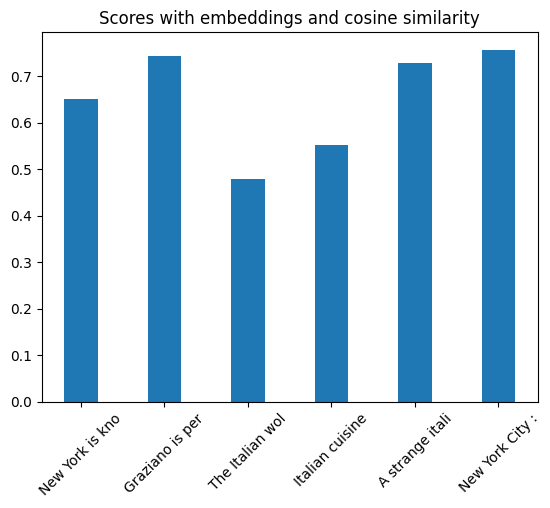

In [27]:
import matplotlib.pyplot as plt

plt.bar([text[:15] for text in text_chunks],dense_scores,width=0.4)
plt.xticks(rotation=45)
plt.title('Scores with embeddings and cosine similarity')

Text(0.5, 1.0, 'Scores with reranker model')

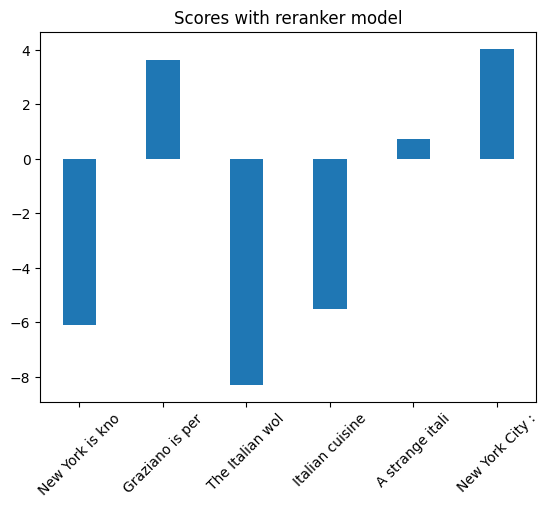

In [28]:
plt.bar([text[:15] for text in text_chunks],rerank_scores,width=0.4)
plt.xticks(rotation=45)
plt.title('Scores with reranker model')





*   Quelle est la différence fondamentale dans l'utilisation, en pratique, des deux méthodes précédentes?
*   En examinant les deux modèles précédents, lequel devrait être en principe le plus performant et pourquoi?
*   Finalement, quels sont les intérêts d'avoir à disposition ces deux modèles et en quoi peuvent-ils être complémentaires?
*   Pourquoi parle-t-on de modèle reranker?


Réponses :
*  Dans le premier modèle, chaque passage ne passe qu'une fois par le modèle. Lors de la réception d'une requête, seule l'embedding de la requête doit être recalculer. Dans le deuxième chaque passage repasse par le modèle pour chaque requête.
*  Le deuxième modèle est entraîné spécifiquement pour cette tâche et devrait être le plus performant.
*  On peut utiliser le premier modèle pour garder un nombre restreint de passages qui passeront ensuite par le deuxième modèle.
*  Le deuxième modèle est alors utiliser pour retrier les passages gardés, d'où le terme *reranker*.

## Bonus

### BM25



*   BM25 est-elle une méthode sparse/BOW ou bien dense?
*   Quels sont les avantages de BM25 par rapport à d'autres méthodes du même type?
*   Implémenter l'algorithme BM25.




In [18]:
def BM25(text_chunks,query):
  return

### word2vec


*   word2vec est-elle une méthode sparse/BOW ou bien dense?
*   Quels sont les avantages de word2vec par rapport à d'autres méthodes du même type?
*   Tester l'algorithme word2vec.

### BERT Encoder


*   Utiliser un encodeur BERT correspond à une méthode sparse/BOW ou bien dense?
*   Quels sont les avantages de BERT par rapport à d'autres méthodes du même type?
*   Tester le modèle BERT.